<a href="https://colab.research.google.com/github/ianmcloughlin/jupyter-teaching-notebooks/blob/main/graph_isomorphism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Isomorphism

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

In [2]:
# Resize plots.
plt.rcParams['figure.figsize'] = (6, 6)

In [3]:
# Matrices.
import numpy as np

In [4]:
# Permutations
import itertools as it

In [5]:
# Graphs.
import networkx as nx

In [6]:
# Math.
import math

In [7]:
# Networkx drawing parameters.
params = {'node_color': 'lightskyblue', 'node_size': 800, 'font_size': 18, 'with_labels': True}

<br>

## Graphs

***

In [8]:
# Create an empty graph.
G = nx.Graph()

In [9]:
# Create a set of edges.
# Note that ideally this would be written as {{0, 1}, {1, 2}, {0, 2}}.
# E should be a set of two-subsets of a finite set V (which is defined implicitly from E).
E = ((0, 1), (1, 2), (0, 2))

In [10]:
# Incorporate the edges in G.
# The nodes are just created as needed, based on E.
G.add_edges_from(E)

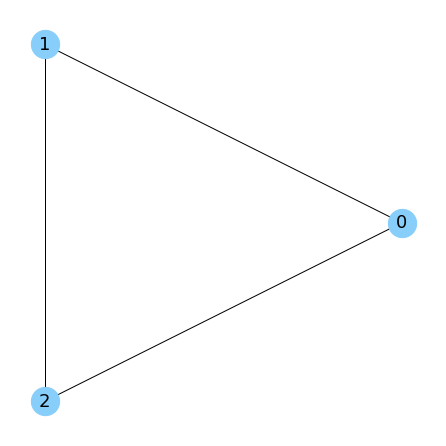

In [11]:
# Draw G.
nx.draw_circular(G, **params)

<br>

## Adjacency Matrices

***

In [12]:
# The adjacency matrix of G.
print(nx.to_numpy_array(G))

[[0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 0.]]


In [13]:
# Convert it to unsigned 8 bit integers (for no good reason).
A = nx.to_numpy_array(G).astype(np.uint8)
print(A)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [14]:
# The transpose of A.
print(A.T)

[[0 1 1]
 [1 0 1]
 [1 1 0]]


In [15]:
# All entries of A and its transpose are the same.
print(A.T == A)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [16]:
# all() checks they're all True.
(A.T == A).all()

True

In [17]:
# A slightly cleaner way to print (binary) matrices.
def matrix_print(A):
  # Loop through rows of A.
  for r in A:
    # Print the current row, removing the brackets numpy puts in.
    print(str(r)[1:-1])
  # Print a blank line.
  print()

In [18]:
# Example.
matrix_print(A)

0 1 1
1 0 1
1 1 0



<br>

## Permutations

***

In [19]:
# A list of numbers.
L = list(range(1, 4))
L

[1, 2, 3]

In [20]:
# All permutations of that list.
# Note that it.permutations returns a generator.
# The number of permutations grows very fast compared to the length of the list.
perms = it.permutations(L)
# Print the permutations.
for perm in perms:
  print(perm)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


<br>

## Permutation Matrices

***

In [21]:
# Number of objects to permute.
N = 3

In [22]:
# List of items in numpy matrix.
L = np.array(range(1, N+1), dtype=np.uint8)
L

array([1, 2, 3], dtype=uint8)

In [23]:
# Identity matrix.
I = np.identity(N, dtype=np.uint8)
matrix_print(I)

1 0 0
0 1 0
0 0 1



In [24]:
# Permutations of rows of I.
perms = it.permutations(range(N))
# Print I with rows permuted by p.
for p in perms:
  # Permutation matrix - using numpy indexing.
  Pmat = I[list(p)]
  matrix_print(Pmat)

1 0 0
0 1 0
0 0 1

1 0 0
0 0 1
0 1 0

0 1 0
1 0 0
0 0 1

0 1 0
0 0 1
1 0 0

0 0 1
1 0 0
0 1 0

0 0 1
0 1 0
1 0 0



In [25]:
# Permutations of rows of I.
perms = it.permutations(range(N))
# Print L permuted by permutation matrices.
for p in perms:
  # Permutation matrix - using numpy indexing.
  Pmat = I[list(p)]
  # L permuted by Pmat.
  Lp = L @ Pmat
  # Print.
  print(Lp)

[1 2 3]
[1 3 2]
[2 1 3]
[3 1 2]
[2 3 1]
[3 2 1]


In [26]:
# Permutations of rows of I.
perms = it.permutations(range(N))
# Print A permuted by permutation matrices.
for p in perms:
  # Permutation matrix - using numpy indexing.
  Pmat = I[list(p)]
  # L permuted by Pmat.
  Ap = Pmat @ A @ Pmat.T
  # Print.
  matrix_print(Ap)

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0

0 1 1
1 0 1
1 1 0



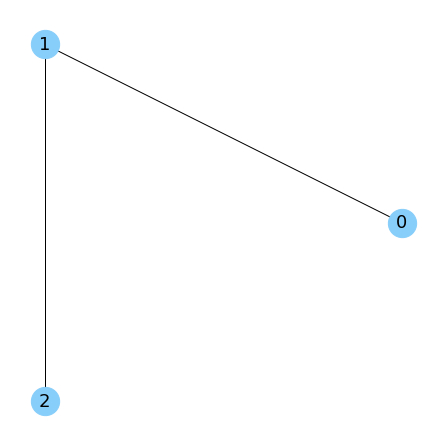

In [27]:
# Let's try a graph that's not so symmetrical.
G = nx.Graph()
E = ((0, 1), (1, 2))
G.add_edges_from(E)
nx.draw_circular(G, **params)

In [28]:
# Adjacency matrix.
A = nx.to_numpy_array(G).astype(np.uint8)
matrix_print(A)

0 1 0
1 0 1
0 1 0



In [29]:
# Permutations of rows of I.
perms = it.permutations(range(N))
# Print A permuted by permutation matrices.
for p in perms:
  # Permutation matrix - using numpy indexing.
  Pmat = I[list(p)]
  # L permuted by Pmat.
  Ap = Pmat @ A @ Pmat.T
  # Print.
  matrix_print(Ap)

0 1 0
1 0 1
0 1 0

0 0 1
0 0 1
1 1 0

0 1 1
1 0 0
1 0 0

0 1 1
1 0 0
1 0 0

0 0 1
0 0 1
1 1 0

0 1 0
1 0 1
0 1 0



<br>

## Permuting Vertices

***

In [30]:
# Create an empty graph.
G = nx.Graph()

In [31]:
# Create a set of edges.
E = ((0, 1), (1, 2), (1, 3), (2, 3))

In [32]:
# Incorporate the edges in G.
G.add_edges_from(E)

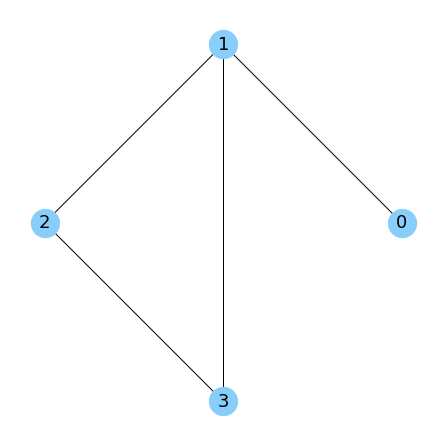

In [33]:
# Draw the graph.
nx.draw_circular(G, **params)

In [34]:
# Adjacency matrix.
A = nx.to_numpy_array(G).astype(np.uint8)
matrix_print(A)

0 1 0 0
1 0 1 1
0 1 0 1
0 1 1 0



In [35]:
# Permutation: 0->0, 1->3, 2->2, 3->1.
p = [0, 3, 2, 1]
# Identity matrix.
I = np.identity(4, np.uint8)
# Permutation matrix.
P = I[p]
# Print.
matrix_print(P)

1 0 0 0
0 0 0 1
0 0 1 0
0 1 0 0



In [36]:
# Permute A.
A_P = P @ A @ P
matrix_print(A_P)

0 0 0 1
0 0 1 1
0 1 0 1
1 1 1 0



In [37]:
# Create new graph from new adjacency matrix.
G_P = nx.from_numpy_matrix(A_P)

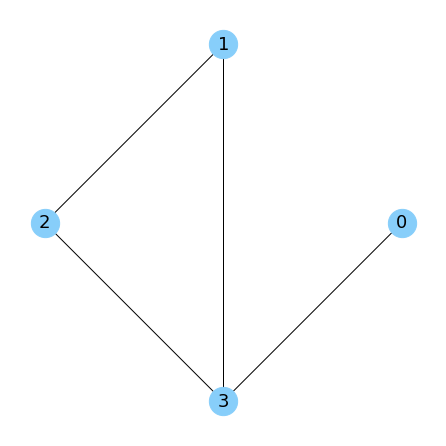

In [38]:
# Draw it.
nx.draw_circular(G_P, **params)

In [39]:
# Another permutation: 0->1, 1->0, 2->2, 3->3.
p = [1, 0, 2, 3]
# Identity matrix.
I = np.identity(4, np.uint8)
# Permutation matrix.
P = I[p]
# Print.
matrix_print(P)

0 1 0 0
1 0 0 0
0 0 1 0
0 0 0 1



In [40]:
# Permute A.
A_P = P @ A @ P
matrix_print(A_P)

0 1 1 1
1 0 0 0
1 0 0 1
1 0 1 0



In [41]:
# Create new graph from new adjacency matrix.
G_P = nx.from_numpy_matrix(A_P)

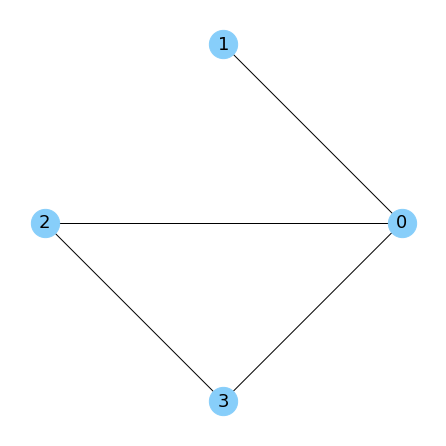

In [42]:
# Draw it.
nx.draw_circular(G_P, **params)

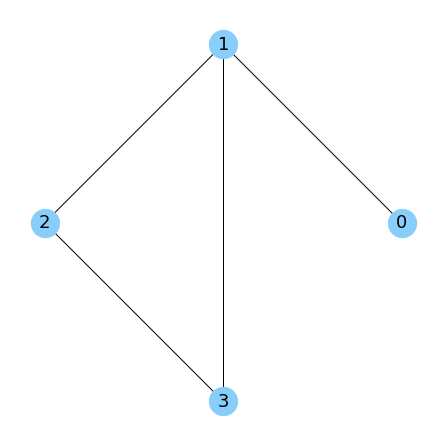

In [43]:
# Original graph.
nx.draw_circular(G, **params)

## A Trickier Graph

***

In [44]:
# The Peterson graph.
G = nx.petersen_graph()

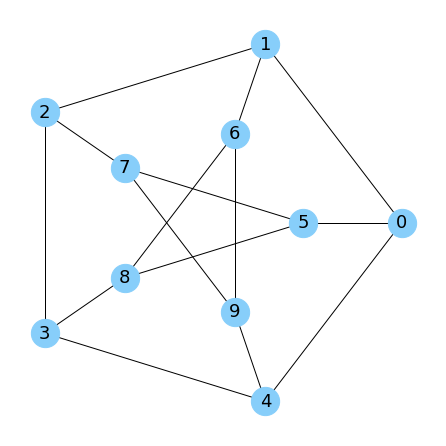

In [45]:
# As it is usually drawn (or close enough).
pos = nx.shell_layout(G, nlist=[[5,6,7,8,9], [0,1,2,3,4]], rotate=0, center=(2,2))
nx.draw(G, pos=pos, **params)

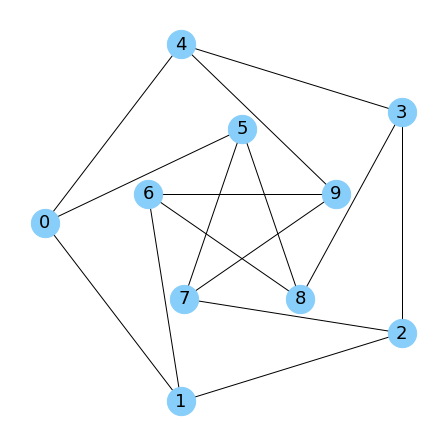

In [46]:
# Does this look like the same graph?
nx.draw_shell(G, nlist=[range(5, 10), range(0, 5)], **params)


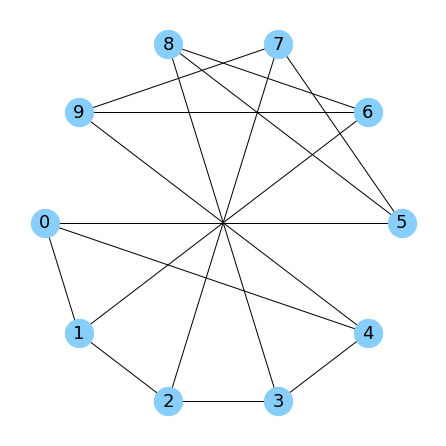

In [47]:
# Does this look like the same graph?
nx.draw_shell(G, **params)

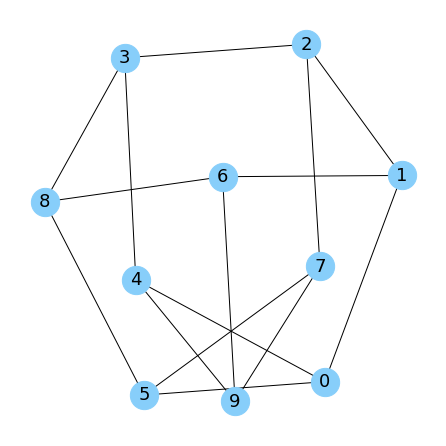

In [48]:
# Does this look like the same graph?
nx.draw_kamada_kawai(G,  **params)

## End